### <font color=skyblue>**Searching for experiments</font>**

**danlab/Subjects/DY_014/2020-12-01/001/**\
(raw data folders)
- raw_ephys_data
    - probe00/
    - probe01/
- raw_video_data
    - bodyCamera.raw.mp4

(Synchronised times)
- alf/
    - bodyCamera.times.npy
    - wheel.position.npy
-
    - probe00/pykilosort/
        - spikes.times.npy

Installaition

In [2]:
# pip install ONE-api
# pip install ibllib # optional

Configuration

In [3]:
# from one.api import ONE
# ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)  # silent means use default parameters for the IBL public database
# one = ONE(password='international')

instantiation

In [4]:
from one.api import ONE
one = ONE()

**<font color=yellow>session path</font>** : The main folder uniquely indentifies an experiment

In [5]:
session_path = 'danlab/Subjects/DY_014/2020-12-01/001/'

**<font color=yellow>eid</font>** : The session path can be converted to a unique experimetn ID

In [6]:
eid = 'a2ec6341-c55f-48a0-a23b-0ef2f5b1d71e'

session path <=> eid

In [7]:
session_path = one.eid2path(eid)
eid = one.path2eid(session_path)

**<font color=yellow>pid</font>** (probe insertion) <=> eid

In [8]:
pids, labels = one.eid2pid(eid)

print(pids)

pid = '6925a312-966c-4e41-b79e-4594da57a2ee' #'695476f6-4c14-b658-948514629079'
eid, pname = one.pid2eid(pid)

['5135e93f-2f1f-4301-9532-b5ad62548c49', '6925a312-966c-4e41-b79e-4594da57a2ee']


#### **<font color=skyblue>Exercise 1</font> - Listing data in an experiment**
ONE has built in list and descibe methods that can be used to explore that data contained within an experiment.\
This method only works with **eids**.

In [9]:
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'

<font color=pink>**one.list_datasets**</font>
- Lists all datasets associated with an eid ; this can take in a "collection" argument.

In [10]:
datasets = one.list_datasets(eid, collection='alf')
print(datasets[20:25])

['alf/probes.description.json', 'alf/rightCamera.ROIMotionEnergy.npy', 'alf/rightROIMotionEnergy.position.npy']


<font color=pink>**one.describe_dataset**</font>
- used to find out more information about a specific dataset

In [11]:
one.describe_dataset('trials.table')

A table of trial events, one per trial. Events include: intervals, goCue_times, response_times, choice, stimOn_times, contrastLeft, contrastRight, feedback_times, feedbackType, rewardVolume, probabilityLeft, firstMovement_times


{'id': 'c634bb4d-a152-4e6f-930d-516957b433e6',
 'name': 'trials.table',
 'created_by': None,
 'description': 'A table of trial events, one per trial. Events include: intervals, goCue_times, response_times, choice, stimOn_times, contrastLeft, contrastRight, feedback_times, feedbackType, rewardVolume, probabilityLeft, firstMovement_times',
 'filename_pattern': '*trials.table*'}

#### **<font color=skyblue>Exercise 2</font> - Searching for experiments**
Find and print the datasets that are in the "alf" collection of the session

In [12]:
eid = 'aad23144-0e52-4eac-80c5-c4ee2decb198'
collection = 'alf'
# use one.list_datasets to find all datasets contained in the session
# use the kwarg collections to restrict the datasets
dsets = one.list_datasets(eid, collection='alf')
print(dsets)

['alf/#2022-01-29#/_ibl_bodyCamera.dlc.pqt', 'alf/#2022-01-29#/_ibl_leftCamera.dlc.pqt', 'alf/#2022-01-29#/_ibl_rightCamera.dlc.pqt', 'alf/#2022-01-29#/bodyCamera.ROIMotionEnergy.npy', 'alf/#2022-01-29#/bodyROIMotionEnergy.position.npy', 'alf/#2022-01-29#/leftCamera.ROIMotionEnergy.npy', 'alf/#2022-01-29#/leftROIMotionEnergy.position.npy', 'alf/#2022-01-29#/rightCamera.ROIMotionEnergy.npy', 'alf/#2022-01-29#/rightROIMotionEnergy.position.npy', 'alf/#2023-04-20#/_ibl_leftCamera.times.npy', 'alf/#2023-04-20#/_ibl_rightCamera.times.npy', 'alf/#2023-04-20#/licks.times.npy', 'alf/_ibl_bodyCamera.times.npy', 'alf/_ibl_leftCamera.dlc.pqt', 'alf/_ibl_leftCamera.features.pqt', 'alf/_ibl_leftCamera.lightningPose.pqt', 'alf/_ibl_leftCamera.times.npy', 'alf/_ibl_rightCamera.dlc.pqt', 'alf/_ibl_rightCamera.features.pqt', 'alf/_ibl_rightCamera.times.npy', 'alf/_ibl_trials.goCueTrigger_times.npy', 'alf/_ibl_trials.stimOff_times.npy', 'alf/_ibl_trials.table.pqt', 'alf/_ibl_wheel.position.npy', 'alf/_i

ONE has two built in search methods that can be used to filter for sessions or insertions that match specific search criteria.

<font color=pink>**one.search**</font>
- allows you to search over sessions
- returns a list of eids

In [13]:
sessions = one.search(subject='k5023')

<font color=pink>**one.search_insertions**</font>
- allows you to search over probe insertions
- returns a list of pids

In [14]:
insertions = one.search_insertions(subject = 'K5023')

The possible **<font color=yellow>kwargs arguments</font>**

In [15]:
search_terms = one.search_terms('remote')
print(search_terms)

('laboratory', 'dataset_types', 'procedures', 'performance_lte', 'dataset', 'qc', 'offset', 'limit', 'location', 'users', 'atlas_acronym', 'subject', 'date_range', 'atlas_id', 'start_time', 'datasets', 'atlas_name', 'performance_gte', 'task_protocol', 'parent_session', 'nickname', 'projects', 'json', 'histology', 'n_trials', 'number', 'n_correct_trials', 'extended_qc', 'end_time', 'dataset_qc_lte', 'project', 'type', 'auto_datetime', 'narrative', 'id', 'django', 'tag', 'name')


In [16]:
search_terms = one.search_terms('remote, insertions')
print(search_terms)

('dataset', 'date_range', 'laboratory', 'number', 'projects', 'subject', 'task_protocol', 'dataset_qc_lte')


Searching by dataset

In [17]:
dataset = 'spikes.times.npy'
# query sessions endpoint
sessions = one.search(dataset=dataset); print(sessions)
# query dataset endpoint
insertions = one.search_insertions(dataset=dataset); print(insertions)

['ebce500b-c530-47de-8cb1-963c552703ea', 'a7eba2cf-427f-4df9-879b-e53e962eae18', '3a3ea015-b5f4-4e8b-b189-9364d1fc7435', '5ae68c54-2897-4d3a-8120-426150704385', 'd85c454e-8737-4cba-b6ad-b2339429d99b', '11163613-a6c9-4975-9586-84dc00481547', 'de905562-31c6-4c31-9ece-3ee87b97eab4', '15b69921-d471-4ded-8814-2adad954bcd8', 'e6594a5b-552c-421a-b376-1a1baa9dc4fd', '4e560423-5caf-4cda-8511-d1ab4cd2bf7d', 'c46b8def-620d-4d70-9397-be5694255f73', '6899a67d-2e53-4215-a52a-c7021b5da5d4', '3f71aa98-08c6-4e79-b4c8-00eae4f03eff', 'a1782f4f-86b0-480c-a7f2-3d8f1ab482ab', '97c1d08d-57b4-4595-8052-91eb84ebfd74', '35eeb752-8f4f-4040-9714-ba0f5b7ccdfe', '004d8fd5-41e7-4f1b-a45b-0d4ad76fe446', 'ca4ecb4c-4b60-4723-9b9e-2c54a6290a53', '7dd27c2f-9544-448d-918d-be0f9837b0e0', 'caa5dddc-9290-4e27-9f5e-575ba3598614', '642c97ea-fe89-4ec9-8629-5e492ea4019d', 'e6bdb1f4-b0bf-4451-8f23-4384f2102f91', '2584ce3c-db10-4076-89cb-5d313138dd38', '1dbba733-24a4-4400-9436-53f1bd8428e8', 'e6de6c35-1508-4471-b7c3-f12a5c7a6d39',

Searching by brain region

In [18]:
brain_acronym = 'CA1'
# query sessions endpoint
sessions = one.search(atlas_acronym=brain_acronym, query_type='remote'); print(sessions)
# query insertions endpoint
insertions = one.search_insertions(atlas_acronym=brain_acronym); print(insertions)

#### **<font color=skyblue>Exercise 3</font>**
Find the number of sessions that pass through the brain region VPM and have DLC (lick.times.npy) data

In [19]:
brain_acronym = 'VPM'
dset = 'licks.times.npy'
# query sessions endpoint using one.search
sessions = one.search(atlas_acronym=brain_acronym, dataset=dset, query_type='remote')
print(f' No. of sessions = {len(sessions)}')

 No. of sessions = 44


##### **Loading data for an experiment**
ONE has built in load methods that can be used to download and load data of interest for an experiment

**1) <font color=pink>one.load_dataset(s)</font>**
- Downloads and loads data for single dataset(s) - This requires knowing the collection

In [20]:
# Load in a single dataset
dataset = 'clusters.amps.npy'
cluster_amps = one.load_dataset(eid, dataset, collection='alf/probe00/pykilosort')

In [21]:
# load in a list of datasets, need to provide list of collectins too
datasets = ['clusters.amps.npy', 'clusters.depths.npy']
(cluster_amps, cluster_depths), info = one.load_datasets(eid,datasets, collections=['alf/probe00/pykilosort', 'alf/probe00/pykilosort'])

**2) <font color=pink>one.load_object</font>**
- Downloads all atibutes associated with a specified object

In [22]:
# load in an object
obj = 'clusters'
clusters = one.load_object(eid, obj, collection='alf/probe00/pykilosort')
print(clusters.keys())

dict_keys(['amps', 'channels', 'depths', 'metrics', 'peakToTrough', 'uuids', 'waveforms', 'waveformsChannels'])


**3) Specialised loader functions : session / spike sorting**
- Downloads all useful datasets for analysis

**<font color=pink>SessionLoader</font>**

In [23]:
# 1. Load session data
from brainbox.io.one import SessionLoader
from one.api import ONE
one = ONE()

# Select an eid
eid = '4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a'

# Load the data
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()
sl.load_wheel()
sl.load_pose()

c:\Users\stell\anaconda3\envs\ibl\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "2022-01-31", ""
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\ibl\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "2022-01-31", ""
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\ibl\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "2022-01-31", ""
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


**<font color=pink>SpikeSortingLoader </font>**

In [24]:
# 2. Load spike sorting data
from brainbox.io.one import SpikeSortingLoader
from one.api import ONE
one = ONE()

# Select a pid
pid = '695476f6-4c14-4a2f-b658-948514629079'

# load the data
spike_loader = SpikeSortingLoader(pid=pid, one=one)
spikes, clusters, channels = spike_loader.load_spike_sorting()
clusters = spike_loader.merge_clusters(spikes, clusters, channels)

c:\Users\stell\anaconda3\envs\ibl\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\ibl\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


##### **Example**
1. Load in trials data for a particular session using 'one.load_object'

In [25]:
# 1. Load in trials data
from one.api import ONE

eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
trials = one.load_object(eid, 'trials')

2. Explore the trials object

In [26]:
# 2. Explore the trials object

# Find the keys in our object
keys = trials.keys()
print(f'Trials object has attributes: {keys}')

# Explore the shape of the individual items
print('\n')
for key in keys:
    print(f'{key} has shape {trials[key].shape}')

# Convert the trials dict to a pandas dataframe
trials_df = trials.to_df()
# Display the trials table
from IPython.display import display # import module to display dataframe
display(trials_df)

Trials object has attributes: dict_keys(['stimOff_times', 'goCueTrigger_times', 'choice', 'contrastLeft', 'stimOn_times', 'response_times', 'goCue_times', 'firstMovement_times', 'probabilityLeft', 'contrastRight', 'feedbackType', 'rewardVolume', 'feedback_times', 'intervals'])


stimOff_times has shape (608,)
goCueTrigger_times has shape (608,)
choice has shape (608,)
contrastLeft has shape (608,)
stimOn_times has shape (608,)
response_times has shape (608,)
goCue_times has shape (608,)
firstMovement_times has shape (608,)
probabilityLeft has shape (608,)
contrastRight has shape (608,)
feedbackType has shape (608,)
rewardVolume has shape (608,)
feedback_times has shape (608,)
intervals has shape (608, 2)


,stimOff_times,goCueTrigger_times,choice,contrastLeft,stimOn_times,response_times,goCue_times,firstMovement_times,probabilityLeft,contrastRight,feedbackType,rewardVolume,feedback_times,intervals_0,intervals_1
0,15.867546,14.145882,-1.0,NaN,14.145685,14.800484,14.146585,14.479997,0.5,1.000,1.0,1.5,14.800586,10.969770,16.367592
1,19.617038,18.296189,1.0,0.2500,18.296037,18.552188,18.296837,18.437997,0.5,NaN,1.0,1.5,18.552278,16.748692,20.117087
2,22.462120,20.979787,-1.0,NaN,20.979602,21.396189,20.980468,21.110997,0.5,0.250,1.0,1.5,21.396293,20.487884,22.962199
3,25.212778,23.834504,-1.0,NaN,23.834316,24.152707,23.835416,24.047997,0.5,0.125,1.0,1.5,24.152818,23.336199,25.712823
4,28.034496,26.650927,-1.0,NaN,26.650735,26.963229,26.651735,26.735997,0.5,0.250,1.0,1.5,26.963303,26.085824,28.534539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,2883.413596,2881.596802,-1.0,NaN,2881.596645,2882.352307,2881.597778,2882.013997,0.2,0.000,1.0,1.5,2882.352403,2881.060798,2883.913720
604,2888.246880,2885.685226,-1.0,0.0625,2885.685069,2886.185928,2885.686069,2885.973997,0.2,NaN,-1.0,0.0,2886.186719,2884.817523,2888.746939
605,2891.918113,2890.201343,-1.0,NaN,2890.201184,2890.846547,2890.201984,2890.420997,0.2,0.250,1.0,1.5,2890.846653,2889.643640,2892.418160
606,2950.578646,2894.046465,1.0,0.1250,2894.046333,2949.519476,2894.047266,2894.367997,0.2,NaN,1.0,1.5,2949.519585,2893.415063,2951.078685


3. Compute the reaction time for each trial in the session

In [27]:
# Compute reaction time

# Define the reaction time as the time when the visual stimulus appears and detected response time
reaction_time = trials['response_times'] - trials['stimOn_times']

4. Compute whether there are differences in reaction time depending on stimulus left vs right trial type

In [28]:
# 4. Evaluate the reaction time across different trial types

import numpy as np
# Compute reaction time for left vs right trials
left_trial_idx = ~np.isnan(trials['contrastLeft'])
right_trial_idx = ~np.isnan(trials['contrastRight'])

left_reaction_time = np.nanmean(reaction_time[left_trial_idx])
right_reaction_time = np.nanmean(reaction_time[right_trial_idx])

print(f'Average reaction time for left trials: {left_reaction_time:.2f} seconds')
print(f'Average reaction time for right trials: {right_reaction_time:.2f} seconds')

Average reaction time for left trials: 2.63 seconds
Average reaction time for right trials: 1.06 seconds


#### **<font color=skyblue>Exercise 4</font>**
- Load in all the trials data for the session '4720c98a-a305-4fba-affb-bbfa00a724a4' and compute the difference in reaction time between correct and incorrect trials
- Define reaction time as the difference between the firstMovement_times and the stimOn_times
- Information about trial outcome is stored in the attribute feeedbackType
- The feedbackType can have three values:
    - 1 - correct response
    - -1 - incorrect response
    - 0 - no response

In [29]:
# Load in the trials data using one.load_object
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
trials = one.load_object(eid, 'trials')

# Define the reactioin tine as the difference between firstMovement_times and stimOn_times
reaction_time = trials['firstMovement_times'] - trials['stimOn_times']

# Find the index of the correct and incorrect trials, use the column feedbackType for trial outcome
correct_trial_idx = trials['feedbackType'] == 1
incorrect_trial_idx = trials['feedbackType'] == -1

# Compute the mean reaction time for correct and incorrect trial types
correct_reaction_time = np.nanmean(reaction_time[correct_trial_idx])
incorrect_reaction_time = np.nanmean(reaction_time[incorrect_trial_idx])

Example
1. Load in spike sorting data for a single insertion

In [30]:
# 1. load in spikesorting data
from brainbox.io.one import SpikeSortingLoader
# import ONE and instantiate
from one.api import ONE
one = ONE()
# define pid
pid = '695476f6-4c14-4a2f-b658-948514629079'
# Instantiate with a pid
spike_loader = SpikeSortingLoader(pid=pid, one=one)

# Download and load data
spikes, clusters, channels = spike_loader.load_spike_sorting()

# Assign brain location information from channels to clusters
clusters = spike_loader.merge_clusters(spikes, clusters, channels)

c:\Users\stell\anaconda3\envs\ibl\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\ibl\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


2. Explore the clusters and spikes objects

In [31]:
# 2. Explore the clusters and spikes objects
import numpy as np


# Find the keys in the clusters object
keys = clusters.keys()
print(f'Clusters object has attributes: {keys}')

# Find the number of clusters detected
n_clusters = clusters['channels'].size
print(f'\n in No. of clusters: {n_clusters}')


# Find the keys in the spikes object
keys = spikes.keys()
print(f'\n Spikes object has attributes: {keys}')

# Find the number of detected spikes
n_spikes = spikes['times'].size
print(f'\n No. of spikes: {n_spikes}')


# Display the spike times and spike clusters for the first 10 spikes
print(f'\n Times for first 10 spikes:\n {spikes["times"][:10]}')
print(f'\n Clusters for first 10 spikes:\n {spikes["clusters"][:10]}')

Clusters object has attributes: dict_keys(['channels', 'depths', 'uuids', 'cluster_id', 'amp_max', 'amp_min', 'amp_median', 'amp_std_dB', 'contamination', 'contamination_alt', 'drift', 'missed_spikes_est', 'noise_cutoff', 'presence_ratio', 'presence_ratio_std', 'slidingRP_viol', 'spike_count', 'firing_rate', 'label', 'x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um', 'lateral_um', 'labels', 'rawInd'])

 in No. of clusters: 383

 Spikes object has attributes: dict_keys(['amps', 'clusters', 'depths', 'times'])

 No. of spikes: 11489983

 Times for first 10 spikes:
 [0.01241813 0.01321812 0.01735141 0.01831807 0.0190514  0.01928473
 0.01988472 0.02001805 0.02021805 0.02095138]

 Clusters for first 10 spikes:
 [129  28 267 263  97  28 284 211 129 259]


3. Get spikes for chosen cluster

In [32]:
# 3. Get spikes for a single cluster
import numpy as np
# Get the 25ht good cluster
cluster_id = np.where(clusters['label'] == 1)[0][25]

# Get the index of the spikes object for the chosen cluster
spikes_idx = spikes['clusters'] == cluster_id

# Get the brain region of the chosen clutser
brain_region = clusters['acronym'][cluster_id]
print(f'Brain region of cluster {cluster_id} is {brain_region}')

Brain region of cluster 174 is VPL


4. Load in trials data for associated session

In [33]:
# 4. Load in trials for the associated session
# Convert pid to eid
eid, pname = one.pid2eid(pid)
# Load in the trials
trials = one.load_object(eid, 'trials')

5. Compute and plot firing rate of cluster around trial event

In [34]:
# 5. Coumpute firing rate of cluster around trial event and plot as a raster
# find times when the stimulus appears
events = np.array(sl.trials['stimOn_times'])

from brainbox.singlecell import bin_spikes
# Compute number of spikes in 0.05s bins between 0.5s before stimulus presentation to 1s after stimulus presentation
bin_size = 0.05
pre_time = 0.5
post_time = 1
spike_raster, times = bin_spikes(spikes.times[spikes_idx], events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
spike_raster = spike_raster / bin_size
print(f'Spike raster has shape {spike_raster.shape}')

Spike raster has shape (529, 30)


Text(0, 0.5, 'Trial number')

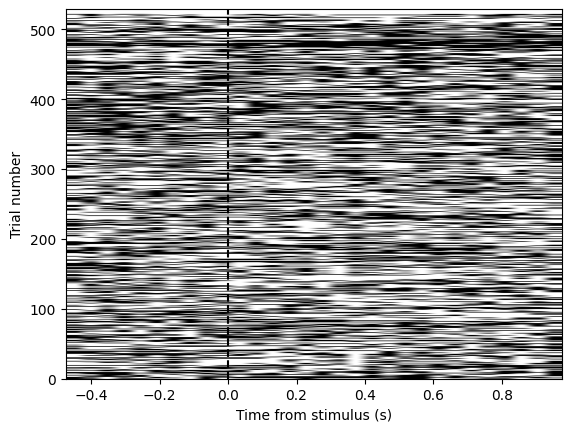

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(spike_raster, extent=[times[0], times[-1], 0, events.size], 
          origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
ax.axvline(0, c='k', linestyle='--')
ax.set_xlabel('Time from stimulus (s)')
ax.set_ylabel('Trial number')

#### **<font color=skyblue>Exercise 5</font>**
- Find all the probe insertions that crosses the region "SCig", and select the first one available.
- Load in the spike sorting data for this probe insertion.
- Find the clusters in "SCig" that are good, i.e. with label=1. How many are there?
- For the first good cluster in SCig, compute the mean firing rate between the first and last spike times.

In [36]:
from brainbox.io.one import SpikeSortingLoader
from one.api import ONE
import numpy as np

one = ONE()

# Define the brain region of interest
brain_acronym = 'SCig'

# Find the insertions that are in the brain region of interest
insertions = one.search_insertions(atlas_acronym=brain_acronym)

# Count how many insertons there are
print(f'There are {len(insertions)} insertions in {brain_acronym}')

# Take the first insertion available as pid
pid = insertions[0]

# Use the SpikesortingLoader to load in the spike sorting data, make sure to merge the clusters
spike_loader = SpikeSortingLoader(pid=pid, one=one)
spikes, clusters, channels = spike_loader.load_spike_sorting()
clusters = spike_loader.merge_clusters(spikes, clusters, channels)

# Find the good clusters in the brain region of interest
good_clu_idx = np.where((clusters['acronym'] == brain_acronym) & (clusters['label'] == 1))[0]
print(f'There are {len(good_clu_idx)} good clusters iin {brain_acronym} for PID {pid}')

# Get the cluster_id for the first good cluster
cluster_id = good_clu_idx[0]

# Get the index of the spikes object for the chosen cluster
spikes_idx = spikes['clusters'] == cluster_id

# Find the minimum and maximum spike time for this cluster
tmin = np.min(spikes['times'][spikes_idx])
tmax = np.max(spikes['times'][spikes_idx])

# Find the number of spikes for the chosen cluster and compute the firing rate
nspikes = np.sum(spikes_idx)
fr = nspikes / (tmax - tmin)
print(f'Mean firing rate for cluster {cluster_id}: {np.round(fr, 2)} Hz')

There are 69 insertions in SCig


c:\Users\stell\anaconda3\envs\ibl\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\ibl\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


There are 17 good clusters iin SCig for PID 9b5fec96-9f19-4ddf-ba1c-3175e15245e9
Mean firing rate for cluster 565: 1.27 Hz
